# Insurance Cost Analysis

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

# =================================================
# 0) Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# =================================================
# 1) Import the dataset

In [136]:
df = pd.read_csv('../data/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# =================================================
# 2) Explore data

- Change the headers for better description

In [137]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [138]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
for col in headers:
    print(f"COLUMN) {col}: Dtype={df[col].dtype}, Type={type(df[col])}, Values={df[col].unique()}")
    print("-------------------------------------")

COLUMN) age: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
-------------------------------------
COLUMN) gender: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['female' 'male']
-------------------------------------
COLUMN) bmi: Dtype=float64, Type=<class 'pandas.core.series.Series'>, Values=[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  3

# =================================================
# 3) Data Wrangling

Handle missing data:
- Replace the '?' entries with 'NaN' values
- Replace 'NaN' with most frequent entry
- Verify the update using `df.info()`

In [140]:
df.replace('?', np.nan, inplace = True)

In [141]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [142]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
is_smoker

'no'

In [143]:
df["smoker"] = df["smoker"].replace({np.nan: is_smoker})

In [144]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [145]:
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0).round(0).astype('int')
mean_age

39

In [146]:
df["age"] = df["age"].replace({np.nan: mean_age})

In [147]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [148]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   gender          1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   no_of_children  1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1338 non-null   object 
 6   charges         1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Convert data types

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

In [150]:
gender_mapping = {"male": 1, "female": 2}
df["gender"] = df["gender"].map(gender_mapping)

In [151]:
smoker_mapping = {"no": 0, "yes": 1}
df["smoker"] = df["smoker"].map(smoker_mapping)

In [152]:
region_mapping = {"northwest": 1, "northeast": 2, "southwest": 3, "southeast": 4}
df["region"] = df["region"].map(region_mapping)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   gender          1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   no_of_children  1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


- Update the `charges` column such that all values are rounded to nearest 2 decimal places
- Verify conversion by printing the first 5 values of the updated dataframe

In [154]:
df[["charges"]] = df[["charges"]].round(2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,2,27.900,0,1,3,16884.92
1,18,1,33.770,1,0,4,1725.55
2,28,1,33.000,3,0,4,4449.46
3,33,1,22.705,0,0,1,21984.47
4,32,1,28.880,0,0,1,3866.86


### Save the data as Excel file

In [155]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [156]:
df.to_excel("../data/insurance.xlsx", index=False)

# =================================================
# 4) Exploratory Data Analysis (EDA)

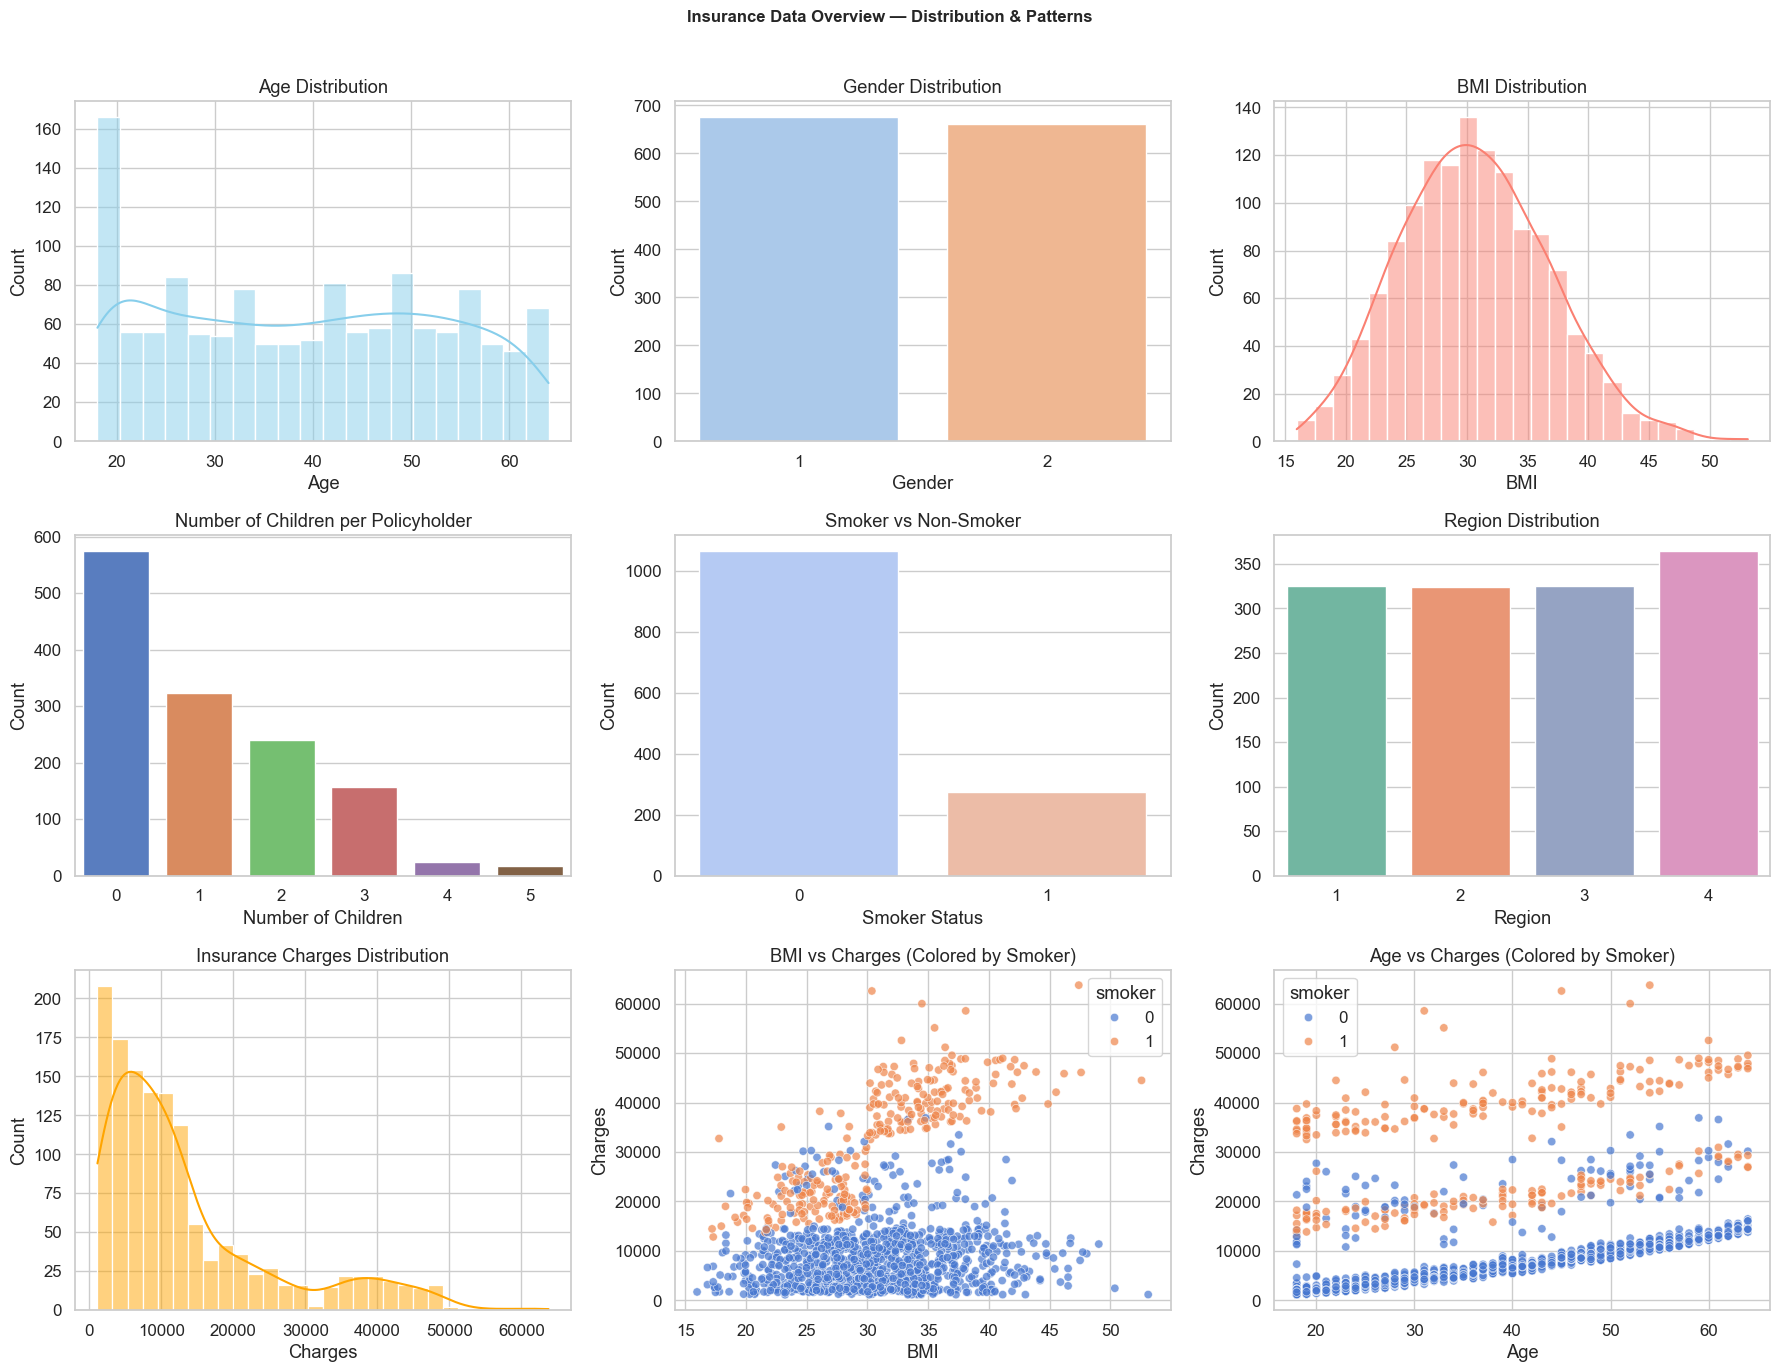

In [169]:
# ==============================
# Set Seaborn theme for consistency
# ==============================
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ==============================
# Create a Figure Grid
# ==============================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
fig.suptitle("Insurance Data Overview — Distribution & Patterns", fontsize=12, fontweight="bold")

# ==============================
# Age Distribution
# ==============================
sns.histplot(df['age'], kde=True, bins=20, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# ==============================
# Gender Distribution
# ==============================
sns.countplot(data=df, x='gender', hue='gender', palette='pastel', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# ==============================
# BMI Distribution
# ==============================
sns.histplot(df['bmi'], kde=True, bins=25, color='salmon', ax=axes[0, 2])
axes[0, 2].set_title('BMI Distribution')
axes[0, 2].set_xlabel('BMI')
axes[0, 2].set_ylabel('Count')

# ==============================
# Number of Children
# ==============================
sns.countplot(data=df, x='no_of_children', hue='no_of_children', palette='muted', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Number of Children per Policyholder')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Count')

# ==============================
# Smoker vs Non-Smoker
# ==============================
sns.countplot(data=df, x='smoker', hue='smoker', palette='coolwarm', legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Smoker vs Non-Smoker')
axes[1, 1].set_xlabel('Smoker Status')
axes[1, 1].set_ylabel('Count')

# ==============================
# Region Distribution
# ==============================
sns.countplot(data=df, x='region', hue='region', order=[1, 2, 3, 4], 
              palette='Set2', legend=False, ax=axes[1, 2])
axes[1, 2].set_title('Region Distribution')
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Count')

# ==============================
# Charges Distribution
# ==============================
sns.histplot(df['charges'], kde=True, color='orange', bins=30, ax=axes[2, 0])
axes[2, 0].set_title('Insurance Charges Distribution')
axes[2, 0].set_xlabel('Charges')
axes[2, 0].set_ylabel('Count')

# ==============================
# BMI vs Charges (Smoker Hue)
# ==============================
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7, ax=axes[2, 1])
axes[2, 1].set_title('BMI vs Charges (Colored by Smoker)')
axes[2, 1].set_xlabel('BMI')
axes[2, 1].set_ylabel('Charges')

# ==============================
# Age vs Charges (Smoker Hue)
# ==============================
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7, ax=axes[2, 2])
axes[2, 2].set_title('Age vs Charges (Colored by Smoker)')
axes[2, 2].set_xlabel('Age')
axes[2, 2].set_ylabel('Charges')

# ==============================
# Adjust Layout
# ==============================
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../images/distribution_and_patterns.png", dpi=180)

plt.show()


- Implement the regression plot for `charges` with respect to `bmi`

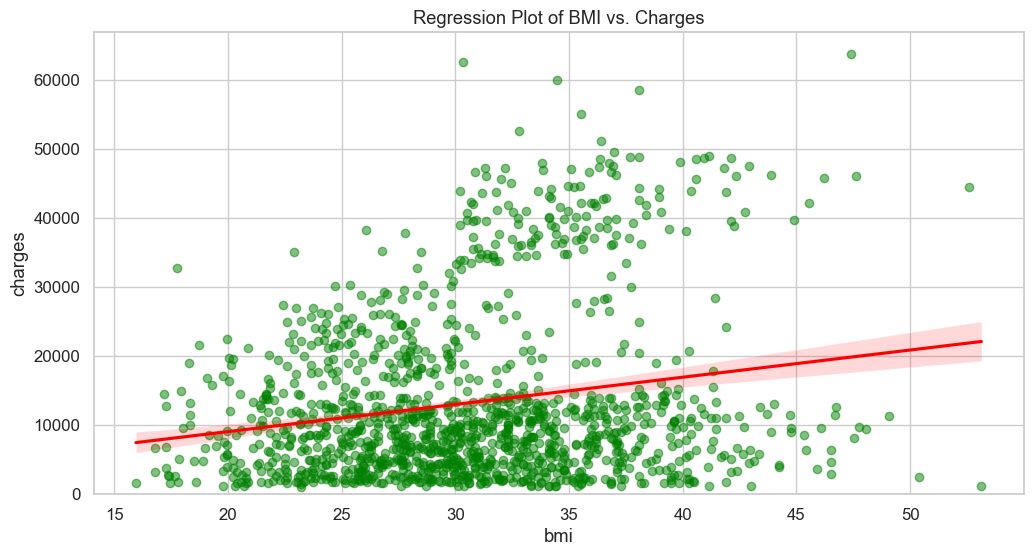

In [170]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Regression Plot of BMI vs. Charges")
sns.regplot(x = "bmi", y = "charges", data = df, ax = ax, line_kws = {"color": "red"}, scatter_kws={"alpha": 0.5, "color": "green"})
plt.ylim(0,)
plt.savefig("../images/regplot_bmi_charges.png", dpi=180)

plt.show()

- Implement the violin plot for `charges` with respect to `smoker`.

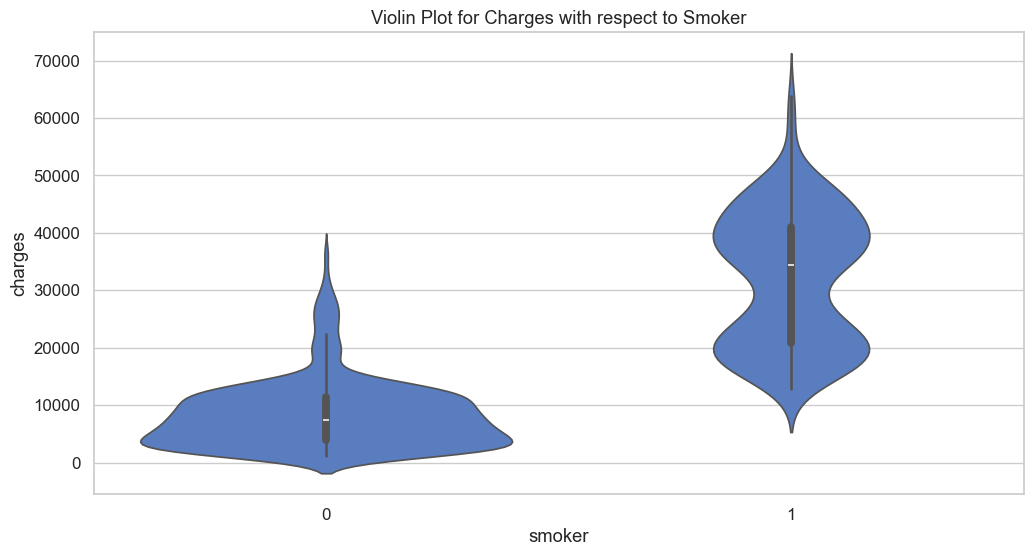

In [171]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Violin Plot for Charges with respect to Smoker")
sns.violinplot(x="smoker", y="charges", data=df, ax=ax)
plt.savefig("../images/violinplot_charges_smoker.png", dpi=180)
plt.show()

- Print the correlation matrix for the dataset.

In [91]:
correlation_matrix= df.corr()
print(correlation_matrix)

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000  0.020856  0.109272        0.042469 -0.025019   
gender          0.020856  1.000000 -0.046371       -0.017163 -0.076185   
bmi             0.109272 -0.046371  1.000000        0.012759  0.003750   
no_of_children  0.042469 -0.017163  0.012759        1.000000  0.007673   
smoker         -0.025019 -0.076185  0.003750        0.007673  1.000000   
region         -0.005212 -0.016121  0.261829       -0.019257  0.053930   
charges         0.299008 -0.057292  0.198341        0.067998  0.787251   

                  region   charges  
age            -0.005212  0.299008  
gender         -0.016121 -0.057292  
bmi             0.261829  0.198341  
no_of_children -0.019257  0.067998  
smoker          0.053930  0.787251  
region          1.000000  0.056993  
charges         0.056993  1.000000  


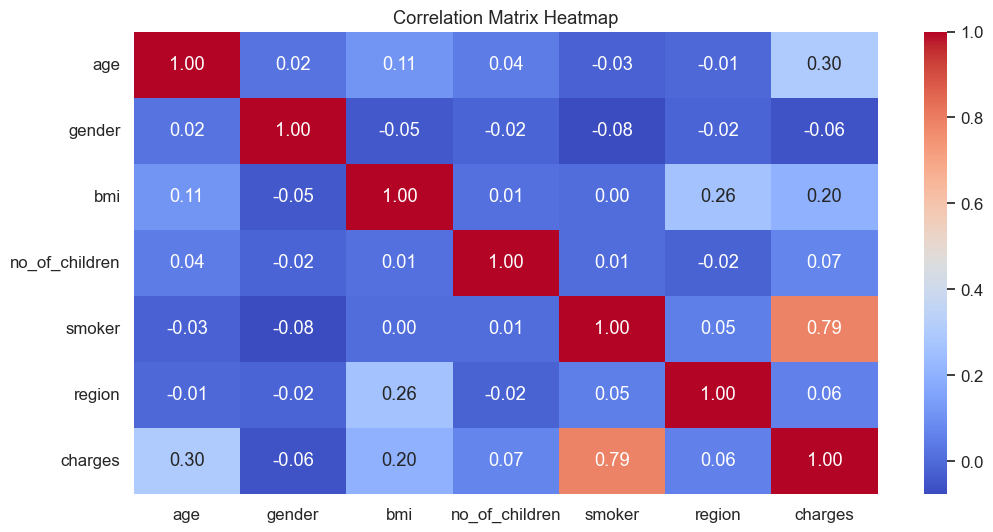

In [172]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig("../images/corr_heatmap.png", dpi=180)
plt.show()

# =================================================
# 5) Model Development

- Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset
- Print the $ R^2 $ score of this model
- Develop single variable and multi variable Linear Regression models for predicting the `charges`

In [107]:
X = df[['smoker']]
Y = df['charges']

lm = LinearRegression()
lm.fit(X,Y)

print(round(lm.score(X, Y), 2))

0.62


- Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset
- Print the $ R^2 $ score of this model. You should see an improvement in the performance

In [108]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z, Y)
print(round(lm.score(Z, Y), 2))

0.75


- Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset
- There should be even further improvement in the performance

In [109]:
# Y and Z use the same values as defined in previous cells 
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)

Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)

print(round(r2_score(Y, ypipe), 2))

0.85


# =================================================
# 6) Model Refinement
- Use Ridge regression to refine the performance of Linear regression models
- Split the data into training/testing subsets (20% of the data for testing)

In [98]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.2, random_state = 1)

- Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $
- Fit the model using training data
- Print the $ R^2 $ score for the testing data

In [110]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)

print(round(r2_score(y_test,yhat), 2))

0.76


- Apply polynomial transformation to the training parameters with degree=2
- Use this transformed feature set to fit the same regression model, as above, using the training subset
- Print the $ R^2 $ score for the testing subset

In [111]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel.fit(x_train_pr, y_train)

y_hat = RidgeModel.predict(x_test_pr)
print(round(r2_score(y_test,y_hat), 2))

0.86


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>
